# Generate data

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline

In [2]:
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [4]:
X.shape

(60, 3)

# Calculate the Principal Components Matrix by Singular Value Decomposition

In [5]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [11]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [21]:
Vt

array([[ 0.93211034,  0.29959193,  0.20350674],
       [-0.34957114,  0.89115586,  0.28920798],
       [ 0.09471185,  0.34071383, -0.93538428]])

In [22]:
Vt.T

array([[ 0.93211034, -0.34957114,  0.09471185],
       [ 0.29959193,  0.89115586,  0.34071383],
       [ 0.20350674,  0.28920798, -0.93538428]])

In [16]:
np.allclose(U.dot(S).dot(Vt),X_centered)

True

# Compare it with sklean PCA implementation

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA()

In [19]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca.components_.T

array([[-0.93211034,  0.34957114,  0.09471185],
       [-0.29959193, -0.89115586,  0.34071383],
       [-0.20350674, -0.28920798, -0.93538428]])

# image compression with PCA

In [27]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [29]:
X = mnist["data"]

In [40]:
pca = PCA(n_components = 0.95)
X_pca = pca.fit_transform(X)

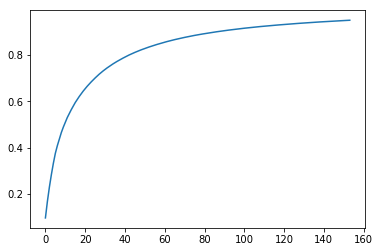

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [42]:
X_pca_inverse = pca.inverse_transform(X_pca)

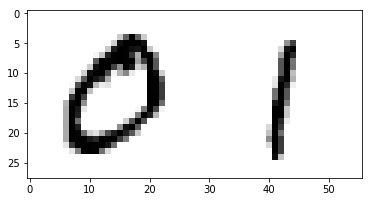

In [51]:
plt.imshow(np.c_[X[0].reshape(28,28),X[9000].reshape(28,28) ], cmap= plt.cm.get_cmap('binary'))

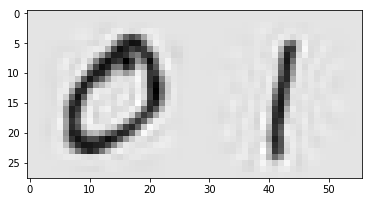

In [52]:
plt.imshow(np.c_[X_pca_inverse[0].reshape(28,28),X_pca_inverse[9000].reshape(28,28)], cmap= plt.cm.get_cmap('binary'))

# Kernal PCA

In [53]:
from mpl_toolkits.mplot3d import Axes3D

In [81]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

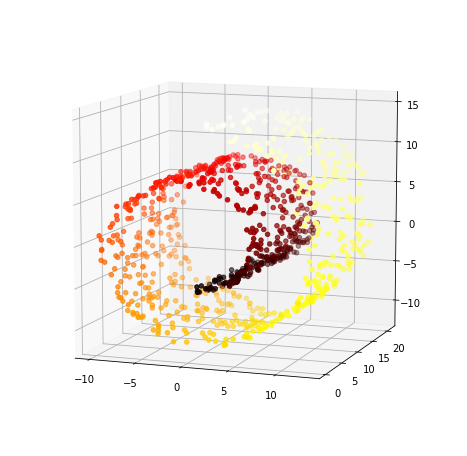

In [64]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = t, cmap=plt.cm.hot)

In [68]:
from sklearn.decomposition import KernelPCA

In [74]:
pca = PCA(n_components=2)
pca_linear = KernelPCA(n_components=2, kernel='linear',fit_inverse_transform=True)
pca_sigmoid = KernelPCA(n_components=2, kernel='sigmoid',gamma=0.001, coef0=1, fit_inverse_transform=True)
pca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)

X_pca = pca.fit_transform(X)
X_linear = pca_linear.fit_transform(X)
X_sigmoid = pca_sigmoid.fit_transform(X)
X_rbf = pca_rbf.fit_transform(X)

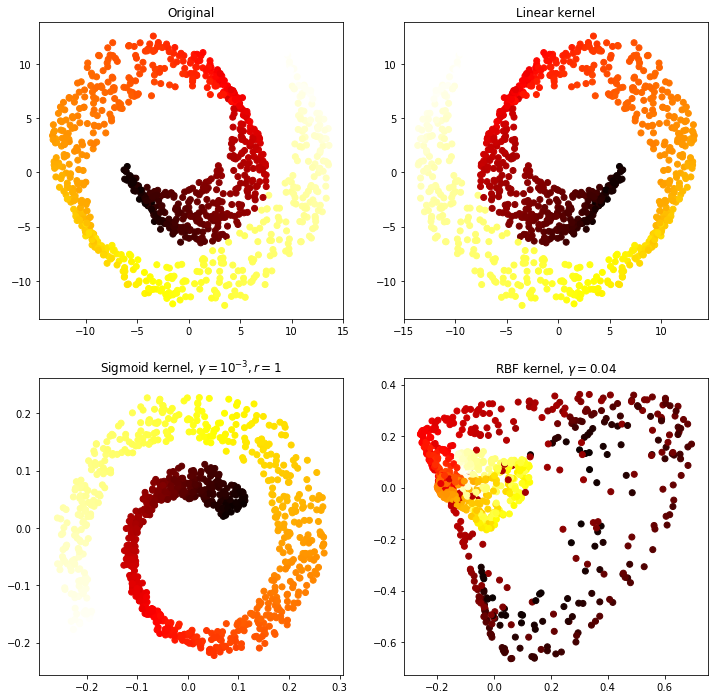

In [76]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (12,12))

for axes,name,x in ((ax1,'Original', X_pca),
                    (ax2,"Linear kernel", X_linear),
                    (ax3,"Sigmoid kernel, $\gamma=10^{-3}, r=1$" , X_sigmoid), 
                    (ax4, "RBF kernel, $\gamma=0.04$", X_rbf)):
    axes.scatter(x[:,0], x[:,1], c = t, cmap=plt.cm.hot)
    axes.set_title(name)

# Manifolds Dimensionality Reduction

In [77]:
from sklearn.manifold import Isomap,MDS,LocallyLinearEmbedding,TSNE

In [109]:
isomap = Isomap(n_components=2)
mds = MDS(n_components=2)
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=12)
t_sne = TSNE(n_components=2,method='exact')

In [94]:
X_isomap = isomap.fit_transform(X)

In [111]:
X_mds = mds.fit_transform(X)

In [110]:
X_lle = lle.fit_transform(X)

In [90]:
X_tsne = t_sne.fit_transform(X)

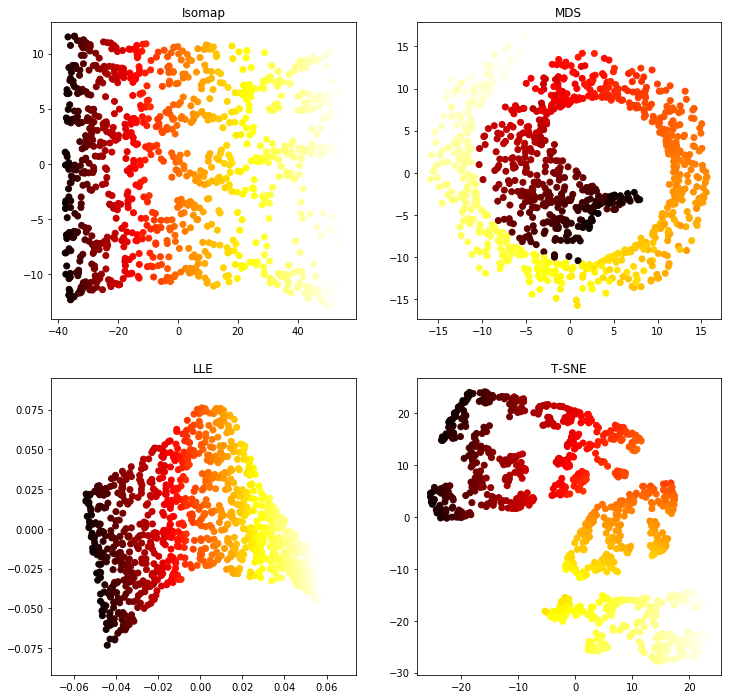

In [112]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (12,12))

for axes,name,x in ((ax1,'Isomap', X_isomap),
                    (ax2,"MDS", X_mds),
                    (ax3,"LLE" , X_lle), 
                    (ax4, "T-SNE", X_tsne)):
    axes.scatter(x[:,0], x[:,1], c = t, cmap=plt.cm.hot)
    axes.set_title(name)